# D212 Data Mining II - Principal Component Analysis
<br>David Harvell
<br>Master of Science, Data Analytics
<br>October 2021
<br>
<br>

#### <font color="blue">A-1.  Propose one question relevant to a real-world organizational situation that you will answer by using principal component analysis (PCA).</font>

We are investigating the customer base for a telecom company, and trying to determine what factors lead to churn (the customer leaving for another company). Since compute resources are finite, and we will encounter a large number of records in our final dataset, we will ask if it is possible to perform dimensionality reduction via feature extraction with Principal Component Analysis.

#### <font color="blue">A-2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.</font>

The goal of this analysis is to reduce the number of variables that are used to predict churn. The reduction can result in faster compute times, but we will have to decide how much accuracy we are willing to lose in order to facilitate the performance gain.

#### <font color="blue">B-1.  Explain how PCA analyzes the selected data set. Include expected outcomes.</font>

PCA begins by creating a matrix of how all of the variables are related to one another. This matrix contains direction and magnitude.
<br><br>
Next, PCA will realign the data so that one of the relational matrix components describes most of the variance, while the other is minimized. Finally, the "direction" with the least importance can be removed to reduce the variables that need to be processed. (Brems, 2019)
<br><br>
The expected outcome will be a dataset with less variables than the original, but still able to retain a majority of the accuracy. This will allow faster processing of predictions.

#### <font color="blue">B-2.  Summarize one assumption of PCA.</font>

One of the core assumptions of PCA is linearity. This is the assumption that all variables in the dataset combine in a linear manner and exhibit relationships among themselves (Vadapalli, 2020).

#### <font color="blue">C-1.  Identify the continuous dataset variables that you will need in order to answer the PCA question proposed in part A1.</font>

First we will review the full dataset and created a trimmed dataset with only the columns of interest.

In [1]:
import pandas as pd
import numpy as np

# Show all columns when reviewing
pd.options.display.max_columns = None

# Load the dataset
df = pd.read_csv('churn_clean.csv')

In [2]:
# describe will limit to the continuous variables
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


>The initial set of variables that seems most relevant are the following:

|Variable|Reasoning|
|:---|:---|
|Outage_sec_perweek|Poor service can drive a customer to leave|
|Email|This could be an indicator of the amount and service level being used|
|Yearly_equip_failure|Again, poor performance can drive customers away|
|Tenure|Loyalty would definitely impact the likelihood of leaving|
|Bandwith_GB_Year|This would be another indicator of usage and what internet service is being used|

In [3]:
# Create a dataframe limited to the variables we want to use
X = df[['Outage_sec_perweek', 'Email', 'Yearly_equip_failure', 'Tenure', 'Bandwidth_GB_Year']]
X.head()

,Outage_sec_perweek,Email,Yearly_equip_failure,Tenure,Bandwidth_GB_Year
0,7.978323,10,1,6.795513,904.536110
1,11.699080,12,1,1.156681,800.982766
2,10.752800,9,1,15.754144,2054.706961
3,14.913540,15,0,17.087227,2164.579412
4,8.147417,16,1,1.670972,271.493436


>Check the histograms for outliers.

array([[<AxesSubplot:title={'center':'Outage_sec_perweek'}>,
        <AxesSubplot:title={'center':'Email'}>],
       [<AxesSubplot:title={'center':'Yearly_equip_failure'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Bandwidth_GB_Year'}>,
        <AxesSubplot:>]], dtype=object)

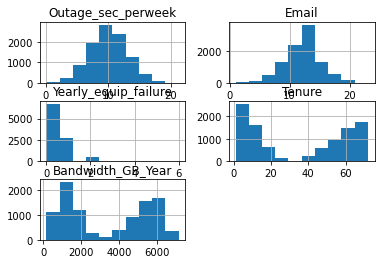

In [4]:
X.hist()

In [5]:
X.isna().sum()

Outage_sec_perweek      0
Email                   0
Yearly_equip_failure    0
Tenure                  0
Bandwidth_GB_Year       0
dtype: int64

>There do not appear to be any empty values or outliers in the data.

In [6]:
# Convert the target variable (Churn) to numeric and save it for training
# This is not covered in this document, but could be used with the resulting PCA variables
conditions = [df['Churn'] == 'Yes', (df['Churn'] == 'No')]
values = [1,0]
new_churn_col = np.select(conditions, values)
df['ChurnBit'] = new_churn_col
y = df['ChurnBit']
y.describe()

count    10000.000000
mean         0.265000
std          0.441355
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ChurnBit, dtype: float64

#### <font color="blue">C-2.  Standardize the continuous dataset variables identified in part C1. Include a copy of the cleaned dataset.</font>

<strong>The resulting CSV will be included with the submitted paper.</strong>

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns = X.columns)
df_scaled.describe()

,Outage_sec_perweek,Email,Yearly_equip_failure,Tenure,Bandwidth_GB_Year
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,9.869883e-17,-1.802336e-16,-5.909051e-16,1.151235e-15,2.119283e-15
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.327464e+00,-3.640754e+00,-6.258635e-01,-1.267917e+00,-1.481263e+00
25%,-6.665728e-01,-6.662818e-01,-6.258635e-01,-1.006306e+00,-9.865847e-01
50%,5.615783e-03,-5.287951e-03,-6.258635e-01,3.420043e-02,-5.162246e-02
75%,6.611971e-01,6.557059e-01,9.466579e-01,1.019358e+00,1.003942e+00
max,3.765413e+00,3.630178e+00,8.809265e+00,1.417195e+00,1.723716e+00


In [8]:
df_scaled.to_csv('churn_scaled_task2.csv', index=False)

#### <font color="blue">D-1.  Determine the matrix of all the principal components.</font>

Now that we have our scaled set of variables, we can fit PCA and <strong>display the matrix of correlation</strong>.

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
pc = pca.fit_transform(X_scaled)
var = pca.explained_variance_ratio_

print(pc)

[[-1.51861441  1.21912925 -0.52435993  0.35656818 -0.06263709]
 [-1.71041258  0.67964671  0.77646513  0.47666944  0.0535953 ]
 [-0.89547685  1.38168689  0.32038223 -0.11736898  0.069119  ]
 ...
 [ 0.58974271  0.08753942 -1.34828218 -0.57251253 -0.09576276]
 [ 1.95119302 -0.99937644  0.60934155 -0.14983045  0.01672141]
 [ 1.52524621 -1.68663937  0.65477471  0.55899613  0.02634083]]


#### <font color="blue">D-2.  Identify the total number of principal components using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.</font>

Creating and elbow plot shows us that the <strong>optimal number of principal components is 4</strong>, due to the low amount of added variance explained with the 5th variable. While the first variable explains the most variance by far, we would still be leaving too much room for low accuracy with a single variable.

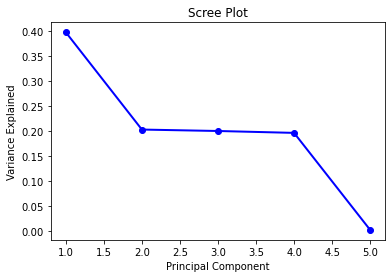

In [10]:
import matplotlib.pyplot as plt
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, var, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

#### <font color="blue">D-3.  Identify the variance of each of the principal components identified in part D2.</font>

<strong>Below are the variances for each variable created by PCA.</strong>

In [11]:
print(var)

[0.39845184 0.20313488 0.20025551 0.19645698 0.00170079]


In [12]:
print(var.cumsum())

[0.39845184 0.60158672 0.80184223 0.99829921 1.        ]


#### <font color="blue">D-4.  Identify the total variance captured by the principal components identified in part D2.</font>

<strong>The total variance captured with 4 variables is 0.9983.</strong>

#### <font color="blue">D-5.  Summarize the results of your data analysis.</font>

Using PCA, we are able to remove one of the variables (down to 4) and should still be able to acheive an accuracy very close to the results with 5 variables.  Although we didn't reduce further, we should still be able to more quickly train our models and predict with the reduction.  This could allow faster results without increased spending for more resources.

#### <font color="blue">Code References</font>

Z. (2021, September 18). How to Create a Scree Plot in Python (Step-by-Step). Statology. Retrieved November 7, 2021, from https://www.statology.org/scree-plot-python/

#### <font color="blue">References</font>

Brems, M. (2019, December 10). A One-Stop Shop for Principal Component Analysis - Towards Data Science. Medium. Retrieved November 7, 2021, from https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

Vadapalli, P. (2020, November 12). PCA in Machine Learning: Assumptions, Steps to Apply & Applications. UpGrad Blog. Retrieved November 7, 2021, from https://www.upgrad.com/blog/pca-in-machine-learning/